# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_current_price = requests.get(btc_url)

# Fetch current ETH price
eth_current_price = requests.get(eth_url)

# Print the response to check if its working
print(btc_current_price)
print(eth_current_price)

<Response [200]>
<Response [200]>


In [6]:
# Convert the output or format the data to JSON 
btc = btc_current_price.json()
eth = eth_current_price.json()

In [7]:
# Using json.dumps we will format data with the argument indent=4 and print the output 
import json

print(json.dumps(btc, indent=4))
print(json.dumps(eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18823506,
            "total_supply": 18823506,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 43695.0,
                    "volume_24h": 35461416971,
                    "market_cap": 822917776979,
                    "percentage_change_1h": 1.19384313360768,
                    "percentage_change_24h": 3.67458217648004,
                    "percentage_change_7d": -9.32182706525924,
                    "percent_change_1h": 1.19384313360768,
                    "percent_change_24h": 3.67458217648004,
                    "percent_change_7d": -9.32182706525924
                },
                "CAD": {
                    "price": 55811.6235,
                    "volume_24h": 45294867897.0583,
                    "ma

In [8]:
# Select the price of each crypto currency
btc_price = btc['data']['1']['quotes']['CAD']['price']
eth_price = eth['data']['1027']['quotes']['CAD']['price']

print(f"The current btc_price is ${btc_price}")
print(f"The current eth_price is ${eth_price}")

The current btc_price is $55811.6235
The current eth_price is $3925.027943


In [9]:
# Compute current value of my crypto
my_btc_value = (my_btc) * (btc_price)
my_eth_value = (my_eth) * (eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $66973.95
The current value of your 5.3 ETH is $20802.65


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [12]:
# We wiLl verify that Alpaca key and secret were correctly loaded
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [13]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [14]:
# Format current date as ISO format
start = pd.Timestamp("2021-09-22", tz = "America/New_York").isoformat()
end = pd.Timestamp('2021-09-22', tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.tail(5)

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-09-22 00:00:00-04:00  116.11  116.25  116.005  116.19  6079965  436.05   

                                                              
                             high      low   close    volume  
time                                                          
2021-09-22 00:00:00-04:00  440.03  433.747  437.83  91135278

In [15]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.tail(10)

,AGG,SPY
2021-09-22,116.19,437.83


In [16]:
# Print AGG and SPY close prices
agg_close_price = df_closing_prices.iloc[-1]["AGG"]
spy_close_price = df_closing_prices.iloc[-1]["SPY"]

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.19
Current SPY closing price: $437.83


In [17]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21891.50
The current value of your 200 AGG shares is $23238.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value+my_eth_value
shares = my_agg_value+my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares], columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,87776.596298
shares,45129.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

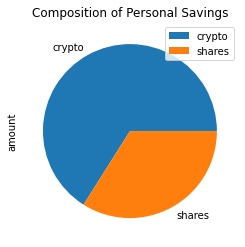

In [19]:
# Plot savings pie chart
df_savings.plot.pie(title='Composition of Personal Savings', y='amount')

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal.")
else:
    print(f"You are {(emergency_fund-total_savings)} from reaching your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-22', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

df_stock_data.dropna(inplace=True)

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-03 00:00:00-04:00  252.46  252.89  252.23  252.85  33875099.0  
2017-10-04 00:00:00-04:00  252.69  253.44  252.56  253.16  30217246.0  
2017-10-05 00:00:00-04:00  253.51  254.68  253.40  254.64  45350955.0  
2017-10-06 00:00:00-04:00  254.15  254.46  253.85  254.40  40706912.0  
2017-10-09 00:00:00-04:00  254.63  254.70  253.65  253.96  23554888.0

In [23]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00  33875099.0          NaN  
2017-10-04 00:00:00-04:00  30217246.0     0.001226  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sadia\Desktop\API-FP-HW5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990997,1.001239,0.984677,0.991632,0.993529,1.001641,1.001815,1.004435,0.996259,0.995622,...,1.003326,0.994903,1.000832,1.020778,0.999135,0.998807,1.010045,0.996962,1.008571,1.008933
2,0.998836,1.002787,0.973722,1.002251,0.977395,0.992970,1.001160,1.007423,0.989010,1.006279,...,0.989605,1.002162,0.993198,1.028793,1.000213,1.012278,0.999090,1.003484,1.006206,1.014708
3,1.001821,1.002489,0.970451,1.006809,0.988278,0.996880,0.994631,1.011121,1.004661,1.006601,...,0.988795,1.006048,0.973180,1.031525,1.003318,1.025226,1.001089,1.012497,1.005534,1.016346
4,1.018814,1.007378,0.958592,1.003094,0.985089,1.000563,0.996016,1.018117,0.992808,1.009091,...,0.992569,1.005671,0.977834,1.038326,0.990086,1.034164,0.997623,1.012700,1.017051,1.013549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,43.320533,35.229602,14.509046,14.885335,16.406451,17.166069,3.331141,35.117662,37.943343,14.480917,...,12.445863,24.809361,11.982182,14.379698,13.864648,7.803053,5.044125,53.804145,17.911382,24.288253
7557,43.064331,35.334056,14.575912,14.993463,16.330703,17.273108,3.353159,34.971538,38.012145,14.331583,...,12.390550,25.136770,12.073692,14.492617,13.698419,7.932660,5.035281,53.911279,17.869592,24.245410
7558,42.842902,35.008202,14.659633,15.093164,16.353502,17.302911,3.388689,35.472327,37.801014,14.298718,...,12.351072,25.110835,12.178733,14.649637,13.781490,7.961841,5.045316,53.368072,17.931168,24.055213
7559,42.537862,34.557431,14.665412,15.466604,16.382039,17.207830,3.430024,35.821897,37.586737,14.235007,...,12.475138,25.244017,12.164694,14.755456,13.808745,7.970448,5.058323,53.256104,18.056754,24.067179


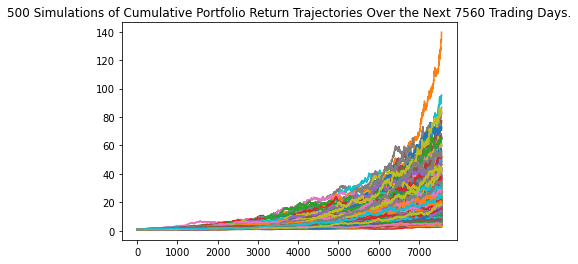

In [27]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")

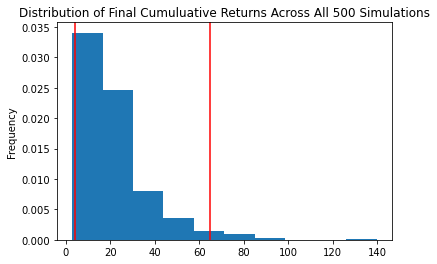

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             21.675580
std              15.899369
min               2.791565
25%              11.282348
50%              17.240922
75%              27.314620
max             139.628667
95% CI Lower      4.120980
95% CI Upper     64.639210
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82419.61 and $1292784.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*(20000*1.5),2)
ci_upper = round(tbl[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $123629.41 and $1939176.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# Set number of simulations
num_sims = 500

MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

df_stock_data.dropna(inplace=True)

# Printing the simulation input data
MC_five_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00  33875099.0          NaN  
2017-10-04 00:00:00-04:00  30217246.0     0.001226  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sadia\Desktop\API-FP-HW5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010692,0.995900,0.987362,1.004690,1.006562,1.009164,1.013544,1.003161,0.995283,0.993747,...,0.993439,0.998193,1.005221,1.003573,0.987038,1.002692,0.990157,1.022767,0.998751,0.994886
2,1.006518,0.993105,0.984627,0.997824,1.005733,1.008541,1.010059,0.998308,0.991009,0.992064,...,0.976722,1.006249,1.005090,1.006797,0.995703,1.003998,0.996453,1.018228,1.005063,0.997268
3,0.999498,0.997136,0.981274,0.999856,1.008757,1.005906,1.005000,1.002604,0.985544,0.996924,...,0.992668,1.017408,1.012302,1.003675,0.994103,0.994733,0.987321,1.024456,1.004571,1.012451
4,0.993427,1.003893,0.992752,1.013407,1.008769,0.996470,1.005371,1.017527,0.992523,1.002388,...,0.985089,1.020766,1.012704,1.001877,0.989613,0.991290,0.982262,1.025259,1.005215,1.023407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.316300,1.069946,1.416405,1.364372,2.477083,1.837120,1.629624,1.530147,1.167721,1.431292,...,1.426594,1.036414,1.705655,2.135525,1.044126,1.908286,1.002498,1.544079,1.210613,1.255248
1257,1.316231,1.072431,1.397878,1.356605,2.469682,1.843573,1.630632,1.531634,1.157750,1.411822,...,1.444071,1.041753,1.705725,2.096770,1.053105,1.894627,0.999537,1.548659,1.211905,1.248118
1258,1.308851,1.064999,1.383696,1.348557,2.501591,1.866314,1.657533,1.524707,1.151927,1.426952,...,1.440146,1.030764,1.701074,2.098045,1.060437,1.884951,1.006612,1.540262,1.205015,1.239599
1259,1.314731,1.056289,1.385008,1.343220,2.479966,1.840789,1.655714,1.524670,1.153191,1.427069,...,1.438533,1.034826,1.713072,2.085890,1.058108,1.892232,1.007771,1.550033,1.201796,1.255023


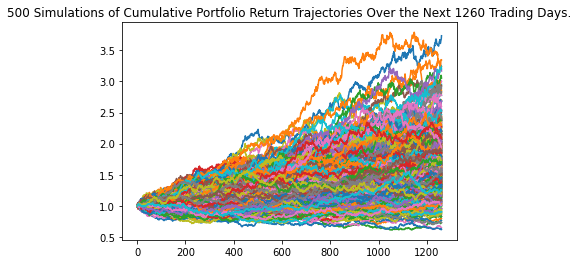

In [34]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

# Save the plot for future usage
line_plot_five.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches="tight")

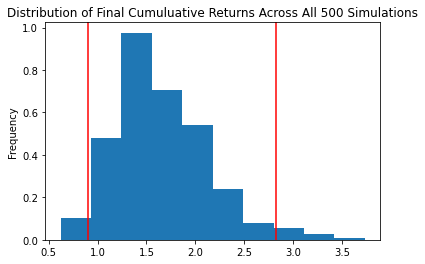

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot_five.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.650010
std               0.477264
min               0.619852
25%               1.312446
50%               1.572748
75%               1.932463
max               3.735474
95% CI Lower      0.905326
95% CI Upper      2.825855
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $247258.82 and $3878352.57


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

# Set number of simulations
num_sims = 500

MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.50, 0.50],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
df_stock_data.dropna(inplace=True)

# Printing the simulation input data
MC_ten_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00  33875099.0          NaN  
2017-10-04 00:00:00-04:00  30217246.0     0.001226  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sadia\Desktop\API-FP-HW5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998686,1.003960,0.993016,1.008338,1.014904,0.992785,0.993123,1.001897,1.004848,1.015041,...,0.999532,0.997367,0.996039,0.998421,0.991626,0.993817,0.998369,0.992409,1.004034,0.994927
2,1.001230,1.003374,0.996045,1.004542,1.026986,0.993209,0.980770,1.007479,1.002409,1.022026,...,1.005452,0.985197,0.997193,0.997237,0.988367,1.001530,1.006586,0.987255,1.001547,0.998712
3,1.006658,1.014612,0.996560,1.003634,1.024564,1.005612,0.979639,1.017461,1.005198,1.015551,...,1.004930,0.979797,0.983017,1.009740,0.984071,0.996713,1.007133,0.978326,0.995603,1.002500
4,1.009096,1.026022,1.002966,1.015223,1.022675,0.998971,0.971473,1.014681,1.008506,1.014730,...,1.003055,0.990431,0.993058,0.999906,0.988045,0.995645,0.996084,0.986315,0.999627,1.016713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.768755,4.944189,1.660204,3.641457,1.576041,1.794383,1.480138,1.498771,2.240545,2.362723,...,3.295827,3.516116,3.159461,2.343879,2.310896,8.492912,3.641264,2.635262,2.519203,2.020656
2517,1.777055,4.941864,1.661426,3.644539,1.559960,1.784916,1.470491,1.512668,2.261550,2.382789,...,3.304883,3.459388,3.161527,2.344983,2.310602,8.551661,3.666462,2.640098,2.542575,1.996626
2518,1.779497,4.989561,1.665481,3.658999,1.571126,1.800596,1.484512,1.513550,2.292650,2.377816,...,3.284027,3.422590,3.192761,2.354819,2.285682,8.589531,3.646108,2.639722,2.516561,1.985393
2519,1.790745,4.958875,1.667270,3.678846,1.569711,1.795612,1.490315,1.499762,2.290291,2.388987,...,3.270943,3.400440,3.196287,2.332378,2.308448,8.606240,3.654192,2.654586,2.564265,1.982006


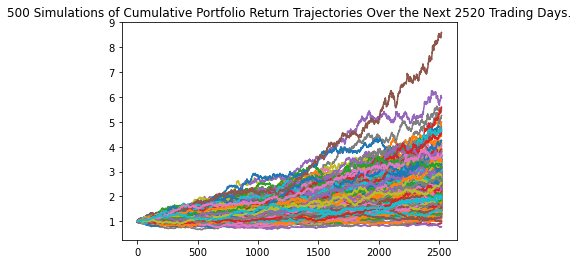

In [40]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

# Save the plot for future usage
line_plot_ten.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

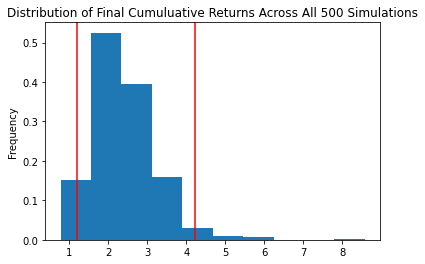

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

# Save the plot for future usage
dist_plot_ten.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.396885
std               0.831879
min               0.771179
25%               1.828719
50%               2.267414
75%               2.842484
max               8.580496
95% CI Lower      1.204435
95% CI Upper      4.218225
Name: 2520, dtype: float64


In [43]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $247258.82 and $3878352.57
